# Prerequisites
- Hashes
- MACs
- Length extension attacks

# Theory

We tried to construct a MAC using a hash function like this
- $S(k, m) = H(k||m)$ where $H$ is a hash function
- We also saw that if $H$ is a Merkle-Damgard construction this is vulnerable to *length-extension atttacks* 

There are different ways to construct MAC functions using hashes

**Append the key**
- $S(k,m) = H(m || k)$
    - Vulnerable to an offline collision finding attack:
        - find $m_1, m_2$ with $h(IV, m_1) = h(IV, m_2)$ where $h$ is the compression function -> Ex: SHA1 collision $2^{80}$ steps with birthday paradox
        - then $H(m_1|| k) = H(m_2||k)$
    
**Envelope method**
- $S(k,m) = H(k||m||k)$
    - This is secure under certain conditions
    
**Two-nest-key**
- $S((k_1,k_2),m) = H(k_2 || H(k_1||m))$
    - This is secure under certain conditions

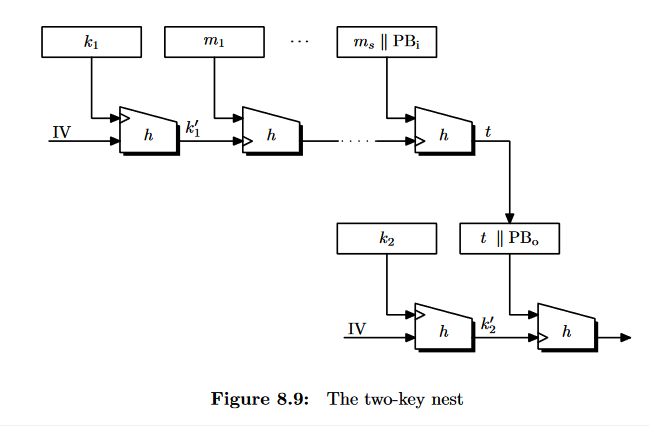

## HMAC and Two-key nest

- https://youtu.be/DiLPn_ldAAQ?t=3611

HMAC is a two-key nest with a twist
> $HMAC_k(m) = H(k_2 || H(k_1 || m))$

- $k_1$ and $k_2$ are not independent
- They are derived from a key $k$
    - $k_1 = k \oplus ipad$
    - $k_2 = k \oplus opad$
    - Where $ipad$ and $opad$ are the *inner* and *outer* pad of $B$ bytes - specified in the standard
        - $ipad = [0x36] \cdot B$
        - $opad = [0x5C] \cdot B$

### Security

Since $k_1$ and $k_2$ are related we cannot claim that the keys are indistinguishable from random anymore => we need some other assumption

Therefore we need to assume that the compression function $h$ is a PRF under a related key attack => Davies-Meyer construction satisfies that if we have an ideal cipher

# Code

In [4]:
import hmac
import hashlib

In [7]:
k = b'my_key'
m = b'secret_message'

my_hmac = hmac.new(k, m, hashlib.sha256)
print(my_hmac.hexdigest())

0994ad3ffd76d7d23f7313b64ff8ce99d6671b7749b664827971f4689ec2ed96


# Resources

- https://www.youtube.com/watch?v=wlSG3pEiQdc
- https://en.wikipedia.org/wiki/HMAC